# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import json
import string

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Preparation

### Loading Data

In [2]:
with open('data2.json') as dataset:
    df = json.load(dataset)

In [3]:
tags = []
pattern = []
responses = {}

for intent in df['intents']:
    responses[intent['tag']] = intent['responses']
    for sentences in intent['patterns']:
        pattern.append(sentences)
        tags.append(intent['tag'])

In [4]:
# Creating Dataframe

df = pd.DataFrame({"inputs": pattern, "tags":tags})
df

,inputs,tags
0,hi,greeting
1,hello,greeting
2,good morning,greeting
3,good afternoon,greeting
4,hey,greeting
5,bye,goodbye
6,goodbye,goodbye
7,see you later,goodbye
8,talk to you later,goodbye
9,how are you?,how_am_i


### Data Preprocessing

In [5]:
# Converting the words to lower letters and removing punctuation

df['inputs'] = df['inputs'].apply(lambda word: [letters.lower() for letters in word if letters not in string.punctuation])
df['inputs'] = df['inputs'].apply(lambda word: ''.join(word))
df

,inputs,tags
0,hi,greeting
1,hello,greeting
2,good morning,greeting
3,good afternoon,greeting
4,hey,greeting
5,bye,goodbye
6,goodbye,goodbye
7,see you later,goodbye
8,talk to you later,goodbye
9,how are you,how_am_i


In [6]:
# apply tokenization, stopwords, lemmatization

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['preprocessed_inputs'] = df['inputs'].apply(preprocess_text)

In [7]:
# find out the vocabulary size

all_words = [word for tokens in df['preprocessed_inputs'] for word in tokens]
vocabulary_size = len(set(all_words))
vocabulary_size

25

In [8]:
# total # of unique tags

len(df['tags'].unique())

16

In [9]:

# Converting Text data to numerical sequences of fixed length for machine learning processing.

tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(df['preprocessed_inputs'])
sequences = tokenizer.texts_to_sequences(df['preprocessed_inputs'])
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length)


In [10]:
# applying label encoder on target feature, in order to feed it into the model.

le = LabelEncoder()
y = le.fit_transform(df['tags'])

In [11]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.1, random_state=42)


# Applying LSTM on the dataset

In [12]:
# Create model
model = Sequential([
    Embedding(vocabulary_size, 64, input_length=max_length),
    LSTM(64),
    Dense(len(df['tags'].unique()), activation='softmax')
])


# model = Sequential([
#     Embedding(vocabulary_size, 50, input_length=max_length),
#     LSTM(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(len(df['tags'].unique()), activation='softmax')
# ])



In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(padded_sequences, y, epochs=120)

Epoch 1/120
2/2 [==============================] - 2s 13ms/step - loss: 2.7700 - accuracy: 0.1724
Epoch 2/120
2/2 [==============================] - 0s 5ms/step - loss: 2.7638 - accuracy: 0.1724
Epoch 3/120
2/2 [==============================] - 0s 6ms/step - loss: 2.7586 - accuracy: 0.1897
Epoch 4/120
2/2 [==============================] - 0s 14ms/step - loss: 2.7535 - accuracy: 0.2586
Epoch 5/120
2/2 [==============================] - 0s 11ms/step - loss: 2.7475 - accuracy: 0.2931
Epoch 6/120
2/2 [==============================] - 0s 7ms/step - loss: 2.7414 - accuracy: 0.3103
Epoch 7/120
2/2 [==============================] - 0s 5ms/step - loss: 2.7345 - accuracy: 0.3276
Epoch 8/120
2/2 [==============================] - 0s 9ms/step - loss: 2.7274 - accuracy: 0.3103
Epoch 9/120
2/2 [==============================] - 0s 13ms/step - loss: 2.7192 - accuracy: 0.2931
Epoch 10/120
2/2 [==============================] - 0s 7ms/step - loss: 2.7102 - accuracy: 0.3103
Epoch 11/120
2/2 [=======

Text(0, 0.5, 'Accuracy')

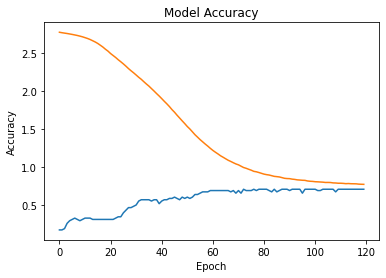

In [15]:
accuracy = history.history['accuracy']
loss = history.history['loss']

plt.plot(accuracy, label='Training Accuracy')
plt.plot(loss, label='Loss')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



# Testing the simple ChatBot

In [16]:
import random 

# Function to predict tag
def predict_tag(text):
    preprocessed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([preprocessed_text])[0]
    padded_sequence = pad_sequences([sequence], maxlen=max_length)
    output = model.predict(padded_sequence)
    predicted_tag = np.argmax(output)
    return predicted_tag

# Chatbot interaction
while True:
    user_input = input('You: ')
    predicted_tag = predict_tag(user_input)
    response_tag = le.inverse_transform([predicted_tag])[0]
    print('Bot:', random.choice(responses[response_tag]))
    
    if response_tag == 'goodbye':
        break


You: HI
1/1 [==============================] - 0s 323ms/step
Bot: How can I help you today?
You: Brief about your company
1/1 [==============================] - 0s 23ms/step
Bot: BRC Mind and Body Wellness Spa in South Miami offers a range of services, including cryotherapy, red light therapy, infrared sauna, hyperbaric chamber, and meditation. Using advanced technology, we focus on enhancing your overall well-beingâ€”both mind and body. Whether you seek relaxation, stress relief, or a holistic health approach, our expert team provides personalized wellness experiences.
You: what services do you provide?
1/1 [==============================] - 0s 22ms/step
Bot: There are mainly 5 types of therapy available, such as: 
 1. Whole Body Cryotherapy. 
 2. Red Light Therapy. 
 3. Vibroacoustic Therapy. 
 4. Far Infrared PEMF Sauna Therapy. 
 5. Mild Hyperbaric Oxygen Therapy.
You: talk about whole body cryotherapy
1/1 [==============================] - 0s 22ms/step
Bot: Whole Body Cryotherapy:

KeyboardInterrupt: Interrupted by user